# Começando a pensar no projeto

BRAIN STORM

- recusar mais crédito

- Elassificar estado dos produtos, identificar se é melhor FP ou FN, 

- Objetivo é discriminar quais são os produtos sem falhas e com falhas (Classificação - supervisionado)


## Contextualização

A PyCoders Ltda., cada vez mais especializada no mundo da Inteligência Artificial e Ciência de Dados, foi procurada por uma fintech para desenvolver um projeto de teste de produtos. Nesse projeto, espera-se a criação de valor que **discrimine ao máximo** os **produtos com falhas** dos **produto sem falhas**. 

Para cada product_code, você recebe vários atributos de produto (fixados para o código), bem como vários valores de medição para cada produto individual, representando vários métodos de teste de laboratório. Cada produto é usado em um experimento simulado de ambiente do mundo real e absorve uma certa quantidade de fluido (carregamento) para ver se falha ou não.

Sua tarefa é usar os dados para prever falhas de novos códigos de produtos individuais com seus resultados de testes de laboratório individuais.

Para isso, foi disponibilizada uma base de dados com milhares de casos de **testes do passado** com diversas características dos produtos. 

Entrega: um modelo com a **melhor performance** possível.

Métrica de performance (inicialmente proposta): **ROC-AUC** (mas isso é flexível, conforme detalhado mais abaixo!)

## Base de Dados

Serão utilizadas bases de dados com **informações de diversos produtos**. 

O conjunto de dados está dividido em **treino e teste**, todos no formato csv. 

Toda a modelagem, validação e avaliação deve ser feita em cima do conjunto de **treino**, que contém o target (arquivo: `train_data.csv`)

## INICIANDO O PROJETO

**Carregando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
descricao = pd.read_csv('test_data.csv')

In [38]:
descricao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5314 entries, 0 to 5313
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5314 non-null   int64  
 1   id              5314 non-null   int64  
 2   product_code    5314 non-null   object 
 3   loading         5257 non-null   float64
 4   attribute_0     5314 non-null   object 
 5   attribute_1     5314 non-null   object 
 6   attribute_2     5314 non-null   int64  
 7   attribute_3     5314 non-null   int64  
 8   measurement_0   5314 non-null   int64  
 9   measurement_1   5314 non-null   int64  
 10  measurement_2   5314 non-null   int64  
 11  measurement_3   5221 non-null   float64
 12  measurement_4   5200 non-null   float64
 13  measurement_5   5186 non-null   float64
 14  measurement_6   5148 non-null   float64
 15  measurement_7   5142 non-null   float64
 16  measurement_8   5108 non-null   float64
 17  measurement_9   5076 non-null   f

In [39]:
descricao['failure'].value_counts()

0    4184
1    1130
Name: failure, dtype: int64

In [40]:
descricao.isna().sum().sort_values(ascending=False)

measurement_17    456
measurement_15    418
measurement_16    396
measurement_14    370
measurement_13    343
measurement_12    331
measurement_11    268
measurement_10    252
measurement_9     238
measurement_8     206
measurement_7     172
measurement_6     166
measurement_5     128
measurement_4     114
measurement_3      93
loading            57
Unnamed: 0          0
id                  0
measurement_2       0
measurement_1       0
measurement_0       0
attribute_3         0
attribute_2         0
attribute_1         0
attribute_0         0
product_code        0
failure             0
dtype: int64

# ANÁLISE E EXPLORAÇÃO DOS DADOS

In [ ]:
# Análise inicial dos dados, como info, dados faltantes (para retirar), estudar as colunas, dados duplicados. SK_ID_CURR
# análises estatísticas, média, mediana, correlação,
# visualização dos dados


In [ ]:
# Particinar os dados (split train e test) -> train e validation

# Preprocessamento de dados -> FEATURE ENGINEERING

In [ ]:
# Preencher dados faltantes, transformar colunas categóricas em numéricas (ou dummies), retirar colunas com mais de n% dos dados faltantes
# Extração de dados, seleção de dados, balanceamento de classe!

# Criar novas colunas, por exemplo taxa (quantidade de pagamento)



In [11]:
descricao.corr().sort_values('failure') # dados numéricos

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
attribute_3,0.558881,-0.000756,-0.538697,1.000000,-0.370232,0.329233,0.013258,-0.002265,0.015470,-0.004034,...,-0.002295,-0.100845,-0.025434,-0.132060,0.028472,-0.049711,0.187519,-0.061520,-0.001418,-0.019222
measurement_1,0.400206,0.002532,-0.377971,0.329233,-0.255255,1.000000,0.005032,-0.008363,0.001535,-0.005587,...,0.004529,0.011986,-0.035312,-0.084605,0.007523,-0.011471,0.060870,-0.004509,-0.004651,-0.010810
measurement_4,0.011313,-0.011792,-0.011797,0.015470,-0.006459,0.001535,-0.009797,0.009573,1.000000,0.005113,...,0.009080,-0.012998,-0.002784,-0.002586,-0.002454,-0.001713,-0.004567,0.002929,0.193045,-0.010488
id,1.000000,0.004305,-0.741200,0.558881,-0.253626,0.400206,0.000128,-0.005923,0.011313,-0.007001,...,0.001550,-0.029611,0.009524,-0.151220,-0.037559,-0.053744,0.083951,-0.059849,-0.000983,-0.007545
measurement_11,0.009524,0.003594,0.094038,-0.025434,0.001878,-0.035312,-0.003877,-0.004427,-0.002784,0.005306,...,-0.007012,-0.035420,1.000000,0.088620,-0.095634,-0.086349,-0.026127,0.091059,-0.011975,-0.004801
measurement_9,0.001550,-0.007751,-0.000098,-0.002295,0.009112,0.004529,0.001884,0.008195,0.009080,-0.003589,...,1.000000,-0.006713,-0.007012,-0.007173,-0.006098,-0.011114,-0.003587,-0.002176,0.145465,-0.003587
measurement_15,0.083951,-0.008087,-0.161242,0.187519,-0.055431,0.060870,0.000138,-0.010986,-0.004567,-0.009101,...,-0.003587,-0.053829,-0.026127,-0.152583,0.028483,0.014073,1.000000,0.028170,0.003160,-0.003544
measurement_13,-0.037559,0.006138,0.049639,0.028472,-0.031527,0.007523,0.029145,0.005893,-0.002454,-0.009325,...,-0.006098,0.031349,-0.095634,0.002399,1.000000,0.005001,0.028483,0.131495,-0.013250,-0.001831
measurement_10,-0.029611,-0.007525,-0.004953,-0.100845,0.032779,0.011986,0.018695,-0.004854,-0.012998,0.002170,...,-0.006713,1.000000,-0.035420,0.031195,0.031349,0.038033,-0.053829,0.004403,0.000477,-0.001515
measurement_16,-0.059849,-0.000633,0.035795,-0.061520,0.003025,-0.004509,0.033088,-0.002164,0.002929,-0.002996,...,-0.002176,0.004403,0.091059,0.095430,0.131495,-0.089798,0.028170,1.000000,-0.002607,0.002237


In [13]:
descricao['attribute_3'].value_counts()

8    11015
9     5343
6     5112
5     5100
Name: attribute_3, dtype: int64

## PIPELINE

- remover tais colunas
- criar outras colunas
- imputer mean nas colunas numéricas
- encoding nas categóricas
- scaler

- balanceamento de classe

# Modelo

Usa o modelo dentro do pipeline

# Avaliar o modelo

In [21]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)
    y_probs_train = estimator.predict_proba(X_train)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))
    
    disp = RocCurveDisplay.from_predictions(y_train, y_probs_train)
    disp.ax_.set_title(f"AUC: {roc_auc_score(y_train, y_probs_train):.3f}", fontsize=16)
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, ls=":", color="black")
    plt.show()

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)
    y_probs_test = estimator.predict_proba(X_test)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))
    
    disp = RocCurveDisplay.from_predictions(y_test, y_probs_test)
    disp.ax_.set_title(f"AUC: {roc_auc_score(y_test, y_probs_test):.3f}", fontsize=16)
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, ls=":", color="black")
    plt.show()

In [ ]:
# TENTA ESCOLHER 3 FEATURES COM O TARGET E RODA UM MODELO.
# VEJA O QUE ACONTECE

In [41]:
# particionar os dados -> test = validação
from sklearn.model_selection import  train_test_split


X = descricao[['measurement_1', 'measurement_2', 'measurement_3']] # são aleatórias só para exemplificar
y = descricao['failure']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
# PIPELINE -> TUDO QUE ACONTECE NO TREINO, ELE VAI REPLICAR PARA O TESTE. ELE ORGANIZA OS PASSOS
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier


#dados faltantes e normalização
pipe_features_num = Pipeline([
    ('input_num',SimpleImputer(strategy='mean')), 
    ('std', StandardScaler())
]) # colocar os passos e os métodos do que iremos fazer com as features numéricas

#transformar as colunas
pre_process = ColumnTransformer([
    ('transf_num', pipe_features_num, X_train.columns.tolist())
]) # apliquei em todas as colunas


# Incluir o modelo no pipeline
pipe_rf = Pipeline([
    ('pre_process', pre_process), 
    ('rf', RandomForestClassifier(class_weight='balanced'))])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['measurement_1',
                                                   'measurement_2',
                                                   'measurement_3'])])),
                ('rf', RandomForestClassifier(class_weight='balanced'))])

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score


Métricas de avaliação de treino:


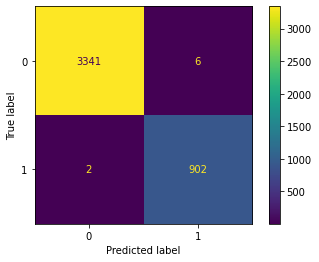

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       0.99      1.00      1.00       904

    accuracy                           1.00      4251
   macro avg       1.00      1.00      1.00      4251
weighted avg       1.00      1.00      1.00      4251



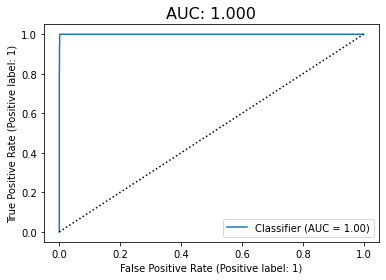


Métricas de avaliação de teste:


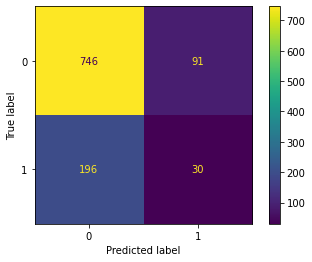

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       837
           1       0.25      0.13      0.17       226

    accuracy                           0.73      1063
   macro avg       0.52      0.51      0.51      1063
weighted avg       0.68      0.73      0.70      1063



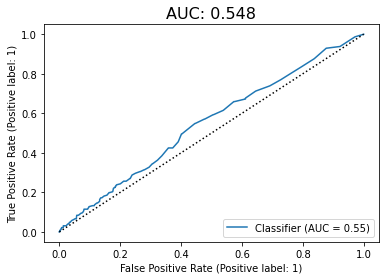

In [43]:
metricas_classificacao(pipe_rf, X_train, X_test, y_train, y_test)